In [29]:
#Import libraries
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

In [30]:
#Import of the clean data from the train_dataset and the test_dataset
df_train= pd.read_csv(r'../Data/train.csv')
df_test= pd.read_csv(r'../Data/test.csv')

df_train = df_train.drop(columns=['userId'])
df_test = df_test.drop(columns=['userId'])

In [31]:
#Convert data into float to be used in our algorithm

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df_train=clean_dataset(df_train)
df_test =clean_dataset(df_test)

In [32]:
#We are using 80-20 split for train-test
VALID_SIZE = 0.2
#We also use random state for reproducibility
RANDOM_STATE = 2018

train, valid = train_test_split(df_train, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [33]:
df_train

,age,gender,scentLover,ecoInterest,MrPropre,Antikal,Ariel,Dash,pods,powder,...,magasin,moyenneSurface,superMarket,hyperMarket,drive,hardDiscount,interested_by_fairypeps_email,level_of_interest_about_marketing,number_of_actions,washDishes
0,0.077922,1.0,0.000000,0.387677,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.002068,1.0
1,0.636364,1.0,0.380207,0.666667,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.022234,1.0
2,0.350649,1.0,0.000000,0.666667,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.009824,1.0
3,0.220779,1.0,0.333333,0.333333,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.4,0.002327,0.0
4,0.259740,1.0,0.380207,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.936143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.454545,1.0,0.380207,0.387677,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.043175,1.0
11996,0.324675,1.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.2,0.000517,0.0
11997,0.311688,1.0,0.380207,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.4,0.009824,0.0
11998,0.272727,0.0,0.380207,0.387677,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.000259,1.0


First, we define the predictors variables, then the target variable to predict

In [34]:
predictors = ['age',
'gender',
'scentLover',
'ecoInterest',
'MrPropre',
'Antikal',
'Ariel',
'Dash',
'pods',
'powder',
'liquid',
'electricToothbrush',
'likesPets',
'hasPet',
'daysSinceActivity',
'nbChildren',
'magasin',
'moyenneSurface',
'superMarket',
'hyperMarket',
'drive',
'hardDiscount',
'interested_by_fairypeps_email',
'level_of_interest_about_marketing',
'number_of_actions']
target = 'washDishes'

In [35]:
train_X = train[predictors]
train_Y = train[target].values
valid_X = valid[predictors]
valid_Y = valid[target].values


Implementation of AdaBoost Algorithm

In [36]:
svc=SVC(probability=True, kernel='linear')
clf =  AdaBoostClassifier(n_estimators=40, base_estimator=svc, learning_rate=0.75)

In [37]:
#Training of the model
clf.fit(train_X, train_Y)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True),
                   learning_rate=0.75, n_estimators=40)

In [38]:
#Validation of the model on the remaining 20% of the training set
preds = clf.predict(valid_X)


In [39]:
preds.shape

(2400,)

Evaluation of our model

In [40]:
clf.score(train_X, train_Y)
acc = round(clf.score(train_X, train_Y) * 100, 2)
print("Ada accuracy (train set):", acc)

Ada accuracy (train set): 62.11


In [41]:

clf.score(valid_X, valid_Y)
acc = round(clf.score(valid_X, valid_Y) * 100, 2)
print("Ada accuracy (validation set):", acc)

Ada accuracy (validation set): 60.75


In [42]:
print(metrics.classification_report(valid_Y, preds, target_names=['Hand', 'Auto']))

              precision    recall  f1-score   support

        Hand       0.60      1.00      0.75      1418
        Auto       0.95      0.04      0.08       982

    accuracy                           0.61      2400
   macro avg       0.78      0.52      0.42      2400
weighted avg       0.75      0.61      0.48      2400



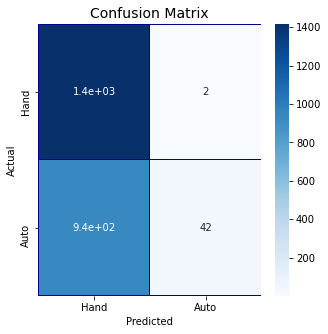

In [43]:
def plot_confusion_matrix():
    cm = pd.crosstab(valid_Y, preds, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
                xticklabels=['Hand', 'Auto'],
                yticklabels=['Hand', 'Auto'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

plot_confusion_matrix()

Let's initialize the GradientSearchCV parameters for optimization. We will set only few parameters, as following:

n_estimators: number of trees in the foreset;

max_features: max number of features considered for splitting a node;

max_depth: max number of levels in each decision tree;

min_samples_split: min number of data points placed in a node before the node is split;

min_samples_leaf: min number of data points allowed in a leaf node.

In [44]:
# WARNING : this part takes too long to execute : our computers aren't enough fast to compute this GradientSearch so we had to stop the execution and we weren't able to determine the best parameters. The solution would be to use cloud computing.
'''
rf_clf = clf.fit(train_X, train_Y) #Gradient Search

parameters = {
    'n_estimators': (50, 100, 200),
    'learning_rate': (0.7, 0.8, 0.9)
}

#We initialize GridSearchCV with the classifier, the set of parameters, number of folds and also the level of verbose for printing out progress.

gs_clf = GridSearchCV(rf_clf, parameters, n_jobs=-1, cv = 5, verbose = 5)
gs_clf = gs_clf.fit(train_X, train_Y)

print('Best scores:',gs_clf.best_score_)
print('Best params:',gs_clf.best_params_)

#Let's predict with the validation data.

preds = gs_clf.predict(valid_X)
'''

"\nrf_clf = clf.fit(train_X, train_Y) #Gradient Search\n\nparameters = {\n    'n_estimators': (50, 100, 200),\n    'learning_rate': (0.7, 0.8, 0.9)\n}\n\n#We initialize GridSearchCV with the classifier, the set of parameters, number of folds and also the level of verbose for printing out progress.\n\ngs_clf = GridSearchCV(rf_clf, parameters, n_jobs=-1, cv = 5, verbose = 5)\ngs_clf = gs_clf.fit(train_X, train_Y)\n\nprint('Best scores:',gs_clf.best_score_)\nprint('Best params:',gs_clf.best_params_)\n\n#Let's predict with the validation data.\n\npreds = gs_clf.predict(valid_X)\n"

In [45]:
#Not possible without the end of the execution of Gradient Search
'''
gs_clf.score(valid_X, valid_Y)
acc = round(gs_clf.score(valid_X, valid_Y) * 100, 2)
print("RandomForest accuracy optimized (validation set):", acc)
'''

'\ngs_clf.score(valid_X, valid_Y)\nacc = round(gs_clf.score(valid_X, valid_Y) * 100, 2)\nprint("RandomForest accuracy optimized (validation set):", acc)\n'

In [46]:
'''print(metrics.classification_report(valid_Y, preds, target_names=['Hand', 'Auto']))'''

"print(metrics.classification_report(valid_Y, preds, target_names=['Hand', 'Auto']))"

Use of our model in the test dataset to submit on Kaggle

In [47]:
prediction_test = clf.predict(df_test)

In [48]:
prediction_test[:10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [49]:
#As we have drop the userId column, we have to add it again next to the predicted values for the column "washDishes" so we get the userId again from the data set test.
df_test_full = pd.read_csv(r'../Data/test.csv')

In [50]:
result_prediction = pd.DataFrame(prediction_test, columns =['WashDishes'])

In [51]:
result_prediction['WashDishes']

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
3995    0.0
3996    0.0
3997    0.0
3998    0.0
3999    0.0
Name: WashDishes, Length: 4000, dtype: float64

In [52]:
submit = pd.concat([df_test_full['userId'],result_prediction['WashDishes']], axis=1)
submit.shape

(4000, 2)

In [53]:
submit

,userId,WashDishes
0,use_yFJKoOUCJ7ED8c8Xeov1TzdfpRL,0.0
1,use_t1WpMt2fprbjEteXNSZ1TzdyvAi,0.0
2,use_w9jT58WcsP3tUkPCA0A1TzgYdeE,0.0
3,use_onifqa3LnOsjZOhPYfN1TzdfkfA,1.0
4,use_KgP1NlkmR24pbU9KRwK1Tzdqm8u,0.0
...,...,...
3995,use_yXWhQEP4R6vvYOeJzz61TZU7JRs,0.0
3996,use_MafnxsXODJV5oVhfi1h1TzdgYQT,0.0
3997,use_Pbui34WhFhPjNeX6TEz1TzdZdVv,0.0
3998,use_sDxhHoOEzHyrAzWSPnM1TzdYVjB,0.0


In [54]:
#Formatting the submit data to fit the submission format expected by Kaggle.
submit.rename(columns={"washDishes": "WashDishes"})

submit['WashDishes'] = submit['WashDishes'].apply(lambda e: 'Auto' if e == 1 else 'Hand')
submit

,userId,WashDishes
0,use_yFJKoOUCJ7ED8c8Xeov1TzdfpRL,Hand
1,use_t1WpMt2fprbjEteXNSZ1TzdyvAi,Hand
2,use_w9jT58WcsP3tUkPCA0A1TzgYdeE,Hand
3,use_onifqa3LnOsjZOhPYfN1TzdfkfA,Auto
4,use_KgP1NlkmR24pbU9KRwK1Tzdqm8u,Hand
...,...,...
3995,use_yXWhQEP4R6vvYOeJzz61TZU7JRs,Hand
3996,use_MafnxsXODJV5oVhfi1h1TzdgYQT,Hand
3997,use_Pbui34WhFhPjNeX6TEz1TzdZdVv,Hand
3998,use_sDxhHoOEzHyrAzWSPnM1TzdYVjB,Hand


In [55]:
submit.to_csv('../DS_CentraleSupelec_ST42021/submit_AdaBoost.csv', index=False)  